### Logistic Regression (Section4.3)


In [1]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
sns.set()

In [2]:
## Reading data set
df_default = pd.read_excel('Data/Default.xlsx')
df_default.head()
df_default['default_2'] = df_default.default.map(lambda x: 1 if x == 'Yes' else 0)
df_default['student_2'] = df_default.student.map(lambda x: 1 if x == 'Yes' else 0)
df_default.head()

,default,student,balance,income,default_2,student_2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0


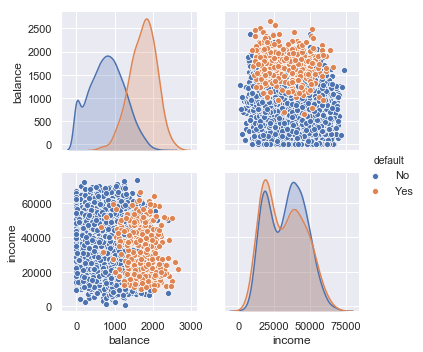

In [3]:
sns.pairplot(df_default.iloc[:,:-2],hue='default')

### Inferences
- Clearly shows that people who default have have less balance

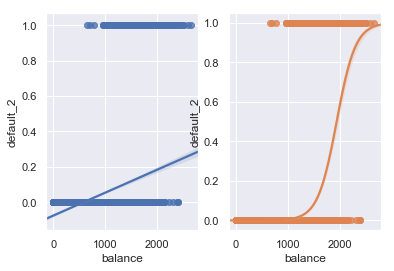

In [4]:
df_balance_pred = df_default.loc[:,['default_2','balance']]
fig, axs = plt.subplots(ncols=2)
sns.regplot(x='balance',y='default_2',data=df_balance_pred,ax=axs[0])
sns.regplot(x='balance',y='default_2',data=df_balance_pred,ax=axs[1],logistic=True)

### Fitting logistic regression using stats model

In [5]:
model = sm.Logit(df_balance_pred.default_2, sm.add_constant(df_balance_pred.balance))
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.453      
Dependent Variable: default_2        AIC:              1600.4517  
Date:               2018-08-10 00:14 BIC:              1614.8724  
No. Observations:   10000            Log-Likelihood:   -798.23    
Df Model:           1                LL-Null:          -1460.3    
Df Residuals:       9998             LLR p-value:      6.2329e-290
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
const       -10.6513    0.3612  -29.4913  0.0000  -11.3592  -9.9435
balance       0.0055    0.0002   24.9524  0.0000    0.0051   0.0059
==================================================================

"""

### Fitting a logistic Regression using scikit library(one variable: balance)

In [6]:
lr = LogisticRegression(C=100000,random_state=1)
lr.fit(df_balance_pred.loc[:,['balance']],df_balance_pred.default_2)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [7]:
print(lr.coef_,lr.intercept_)

[[0.00530412]] [-10.32690088]


### Fitting a logistic Regression using student attribute

In [8]:
df_student_pred = df_default.iloc[:,4:6]
model = sm.Logit(df_student_pred.default_2, sm.add_constant(df_student_pred.student_2))
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.004     
Dependent Variable: default_2        AIC:              2912.6831 
Date:               2018-08-10 00:14 BIC:              2927.1037 
No. Observations:   10000            Log-Likelihood:   -1454.3   
Df Model:           1                LL-Null:          -1460.3   
Df Residuals:       9998             LLR p-value:      0.00054161
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -3.5041    0.0707  -49.5541  0.0000  -3.6427  -3.3655
student_2     0.4049    0.1150    3.5202  0.0004   0.1795   0.6303
=================================================================

"""

In [9]:
lr = LogisticRegression(C=100000,random_state=1)
lr.fit(df_student_pred.loc[:,['student_2']],df_balance_pred.default_2)
print(lr.coef_,lr.intercept_)

[[0.40488653]] [-3.50412724]


### Fitting a multiple logistic Regression

In [10]:
# df_student_pred = df_default.iloc[:,4:6]
# model = sm.Logit(df_student_pred.default_2, sm.add_constant(df_student_pred.student_2))
# result = model.fit()
# result.summary2()
df_multiple_pred = df_default.loc[:,['default_2','balance','income','student_2']]
model = sm.Logit(df_multiple_pred.default_2,sm.add_constant(df_multiple_pred.iloc[:,1:]))
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_2        AIC:              1579.5448  
Date:               2018-08-10 00:14 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
const       -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
student_2    -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
==================================================================

"""

In [11]:
lr = LogisticRegression(C=10000,random_state=1,penalty='l1')
lr.fit(df_multiple_pred.iloc[:,1:],df_multiple_pred.default_2)
print(lr.coef_,lr.intercept_)

[[ 5.47979600e-03 -5.09977540e-06 -8.05955204e-01]] [-10.12449921]


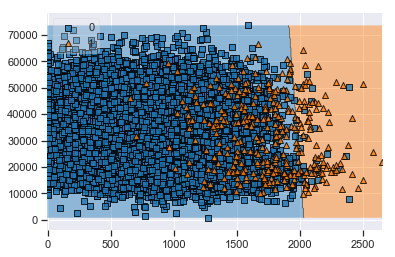

In [12]:
X = df_multiple_pred.iloc[:,1:3]
y = df_multiple_pred.default_2
# Plotting decision regions

lr = LogisticRegression(C=0.1,random_state=1,penalty='l1')
lr.fit(X,y)
plot_decision_regions(X.values, y.values, clf=lr, legend=2)

### SVM with Khan Data

In [13]:
# Reading the data sets
df_Khan_xtrain = pd.read_csv('Data/Khan_xtrain.csv' ).iloc[:,1:]
df_Khan_xtest = pd.read_csv('Data/Khan_xtest.csv').iloc[:,1:]
df_Khan_ytrain = pd.read_csv('Data/Khan_ytrain.csv').iloc[:,1:]
df_Khan_ytest = pd.read_csv('Data/Khan_ytest.csv').iloc[:,1:]


In [14]:
from sklearn.svm import SVC
svm= SVC(kernel= 'linear',C=1.0,random_state=1)
svm.fit(df_Khan_xtrain,df_Khan_ytrain.values.reshape(-1,))
y_pred=svm.predict(df_Khan_xtest)
model_accuracy=accuracy_score(y_pred,df_Khan_ytest.values.reshape(-1,))
print(model_accuracy)

0.9


### Plot Decision Region and fit 2 columns

Wall time: 56.7 s


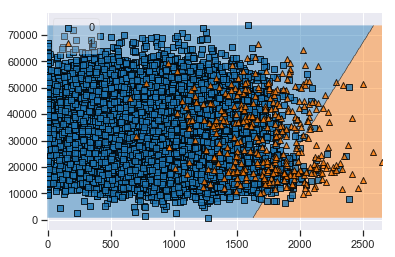

In [15]:
%%time
X = df_multiple_pred.iloc[:,1:3]
y = df_multiple_pred.default_2
# Plotting decision regions

svm= SVC(kernel= 'linear',C=1.0,random_state=1)
svm.fit(X,y.values.reshape(-1,))
plot_decision_regions(X.values, y.values, clf=svm, legend=2)

### Using SGDCClassifier

Wall time: 3 s


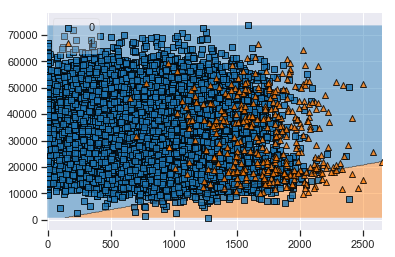

In [16]:
%%time
svm= SGDClassifier(loss='hinge',max_iter=10000)
svm.fit(X,y.values.reshape(-1))
plot_decision_regions(X.values, y.values, clf=svm, legend=2)

Wall time: 257 ms


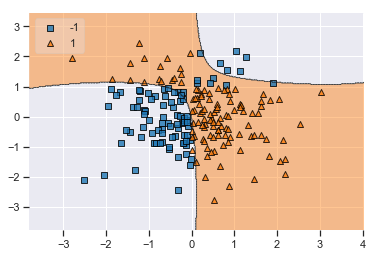

In [27]:
%%time
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>1)
y_xor = np.where(y_xor,1,-1)
X_xor[y_xor==1,0]
# sns.scatterplot(x=X_xor[y_xor==1,0], y=X_xor[y_xor==1,1])
# sns.scatterplot(x=X_xor[y_xor==-1,0], y=X_xor[y_xor==-1,1])
svm = SVC(kernel='rbf',random_state=1,C=10,gamma=0.1)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor, clf=svm, legend=2)

C:\Users\RoySu001\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


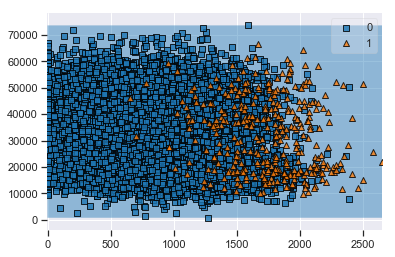

In [30]:
X = df_multiple_pred.iloc[:,1:3]
y = df_multiple_pred.default_2
# Plotting decision regions

svm = SVC(kernel='rbf',random_state=1,gamma=100,C=1.0)
svm.fit(X,y)
plot_decision_regions(X.values, y.values, clf=svm)

In [31]:
import helper_functions as hf